In [1]:
import pprint
import json
from pathlib import Path
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import anatools.analysis as ana

from hhdm_analysis.utils import signal_label, stack_sorting, position, process_signals

ana.start()
plt.style.use("default")

# Setup config

In [2]:
period = '18'
year_style = 2018
dataset_year = "2018"
basedir = "/home/gamoreir/SanDisk/physics/hhdmAnalysis_deepJet_Regions/datasets"

# Setup figure folders
dataset_name = basedir.split('/')[-2]
figures_path = f"./figures/{dataset_name}/{dataset_year}/machine_learning"
Path(figures_path).mkdir(parents=True, exist_ok=True)

# Data folder
data_path = f"./data/{dataset_name}/{dataset_year}"
Path(data_path).mkdir(parents=True, exist_ok=True)

# Read metadata

In [3]:
with open("../metadata.json", "r") as f:
    metadata = json.load(f)

# Load datasets

In [4]:
base_model_name = "multi_signal"

with open(f"{data_path}/{base_model_name}-predicted-data.pickle", "rb") as f:
    ds = pickle.load(f)

# Prepare dataset to plot

In [5]:
region_id = 0 # Signal region

# Prepare data to plot
colors_list = ["gainsboro", "orchid", "limegreen", "red", "skyblue", "darkgoldenrod"]
labels_list = [r"Residual SM", r"$WZ$", r"$ZZ$", "Single top", r"$t\bar{t}$", "Drell-Yan"]
bkg_list = ["Residual", "WZ", "ZZ", "ST", "TT", "DYJetsToLL"]
ds = {k: v[v.RegionID == region_id] for k,v in ds.items()}
dataframes, labels, colors = stack_sorting(ds, colors_list, labels_list, bkg_list)

      Datasets  Number of events
0  Residual SM       2565.160910
1         $ZZ$        467.194135
2         $WZ$        981.335215
3   Single top       6064.535021
4   $t\bar{t}$      29758.911906
5    Drell-Yan     149850.998322
Purity: 0.7899861418308093


# Define variables to plot

In [6]:
# Signals to use in plot
signal_to_use = process_signals([
    ("Signal_400_100", "darkviolet"),
    ("Signal_1000_100", "blue")
])

all_signals = process_signals([
    ("Signal_1000_100", "blue"),
    ("Signal_1000_200", "lightcoral"),
    ("Signal_1000_300", "chocolate"),
    ("Signal_1000_400", "darkorange"),
    ("Signal_1000_600", "moccasin"),
    ("Signal_1000_800", "goldenrod"),
    ("Signal_400_100", "darkviolet"),
    ("Signal_400_200", "yellowgreen"),
    ("Signal_500_100", "green"),
    ("Signal_500_200", "turquoise"),
    ("Signal_500_300", "darkcyan"),
    ("Signal_600_100", "cyan"),
    ("Signal_600_200", "indigo"),
    ("Signal_600_300", "violet"),
    ("Signal_600_400", "deeppink"),
    ("Signal_800_100", "crimson"),
    ("Signal_800_200", "red"),
    ("Signal_800_300", "saddlebrown"),
    ("Signal_800_400", "gainsboro"),
    ("Signal_800_600", "dimgray"),
])

# Variables to plot
var1 = "MLP_score_torch"
var2 = "XGB_score"
var3 = "MLP_score_keras"
xmin = 0
xmax = 1
nbins = 51
bins = np.linspace(xmin, xmax, nbins)

# Plot XGB

## Background vs Signal study

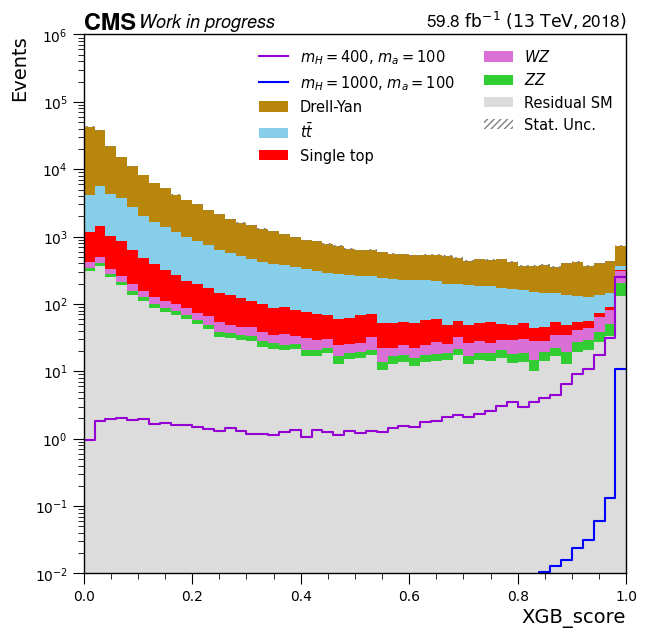

In [7]:
xlabel = "XGB_score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ybkg, errbkg = ana.stacked_plot(ax1, var2, dataframes, labels, colors, weight="evtWeight", bins=bins)

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e6]
)
plt.savefig(f"{figures_path}/{base_model_name}-{var2}.png", dpi=200, facecolor='white')
plt.show()
plt.close()


## All signals study

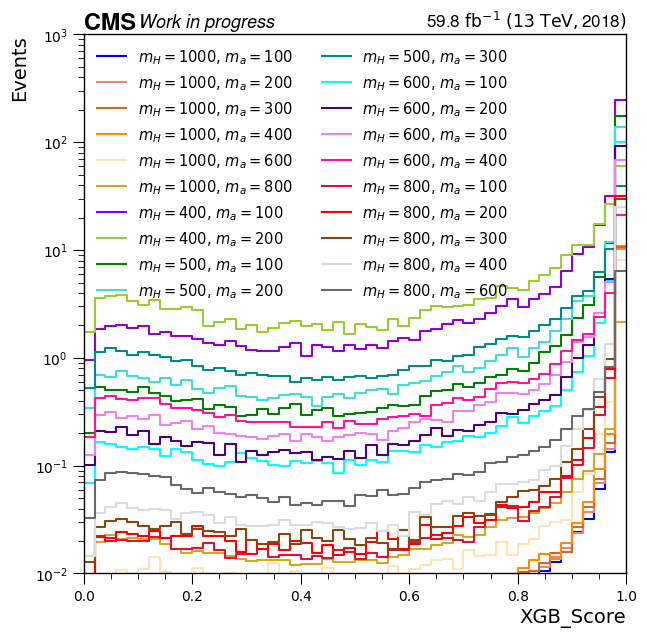

In [8]:
xlabel = "XGB_Score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in all_signals:
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e3], legend_loc="upper left"
)
plt.savefig(f"{figures_path}/{base_model_name}-{var2}-all_signals.png", dpi=200, facecolor='white')
plt.show()
plt.close()


# Plot MLP Keras

## Background vs signal study

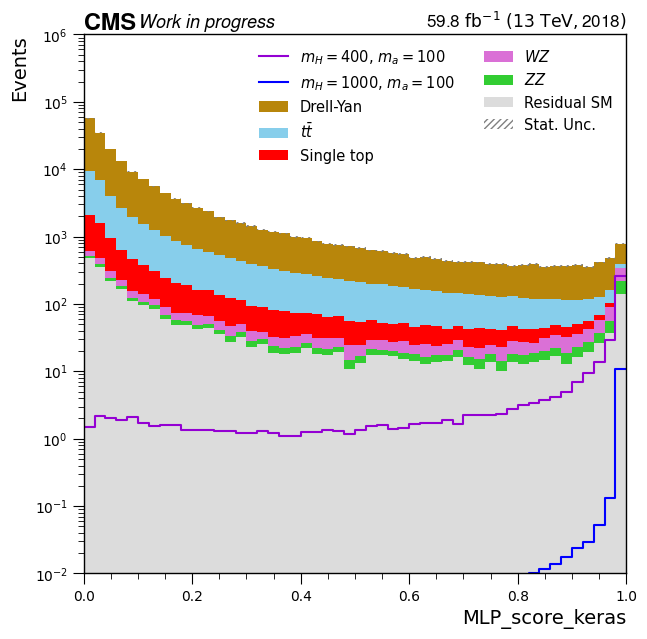

In [9]:
xlabel = "MLP_score_keras"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var3, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ybkg, errbkg = ana.stacked_plot(ax1, var3, dataframes, labels, colors, weight="evtWeight", bins=bins)

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e6]
)
plt.savefig(f"{figures_path}/{base_model_name}-{var3}.png", dpi=200, facecolor='white')
plt.show()
plt.close()


## All signals study

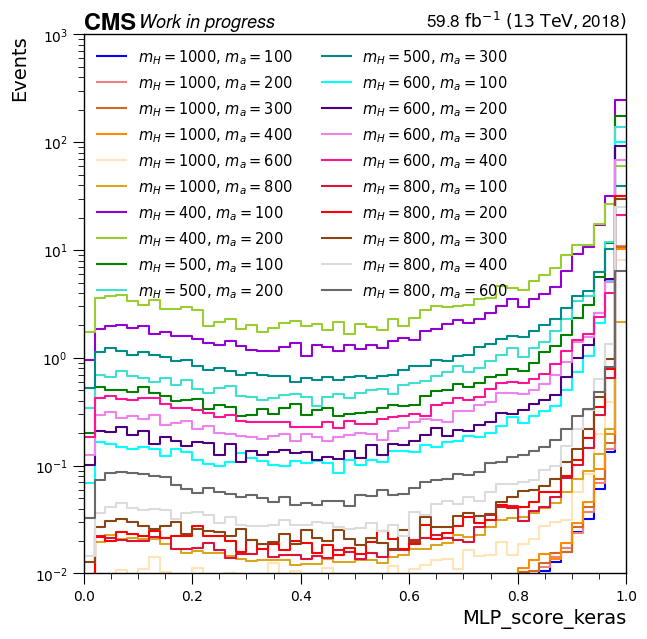

In [10]:
xlabel = "MLP_score_keras"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in all_signals:
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e3], legend_loc="upper left"
)
plt.savefig(f"{figures_path}/{base_model_name}-{var2}-all_signals.png", dpi=200, facecolor='white')
plt.show()
plt.close()


# Plot XGB vs MLP Keras

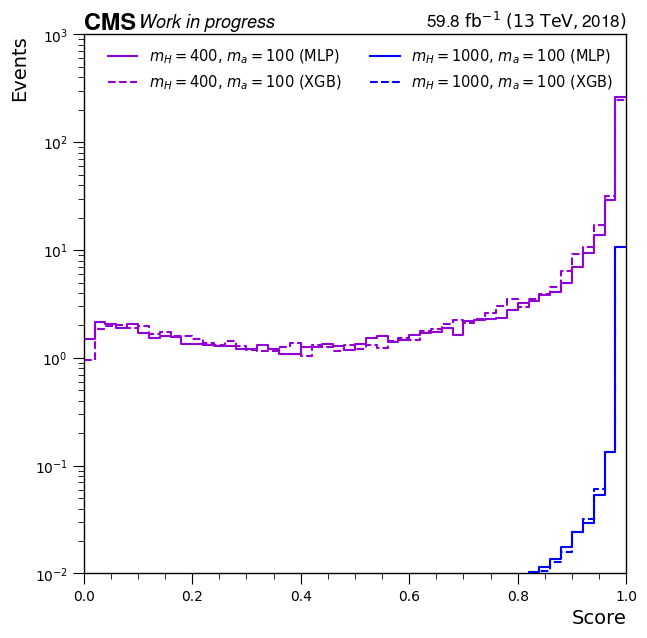

In [11]:
xlabel = "Score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var3, ds[signal["key"]],
        label=signal["label"] + " (MLP)", color=signal["color"],
        weight="evtWeight", bins=bins
    )
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"] + " (XGB)", color=signal["color"],
        weight="evtWeight", bins=bins, linestyle="--"
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e3]
)
plt.savefig(f"{figures_path}/{base_model_name}-discriminators-xgb-mlp-keras.png", dpi=200, facecolor='white')
plt.show()
plt.close()


# Compare models from this work to MLP model using pyTorch made by Gilson

## Plot MLP Torch: Background vs signals study

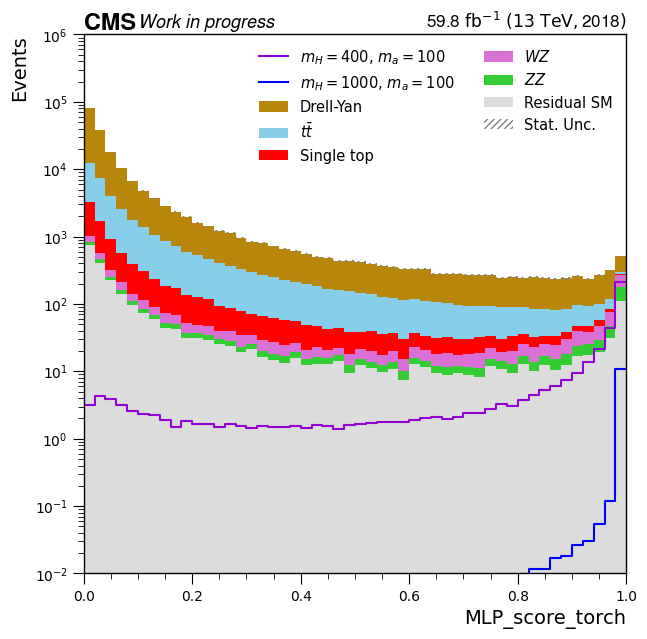

In [12]:
xlabel = "MLP_score_torch"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var1, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ybkg, errbkg = ana.stacked_plot(ax1, var1, dataframes, labels, colors, weight="evtWeight", bins=bins)

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e6]
)
plt.savefig(f"{figures_path}/{base_model_name}-{var1}.png", dpi=200, facecolor='white')
plt.show()
plt.close()


## Plot MLP Torch: all signals study

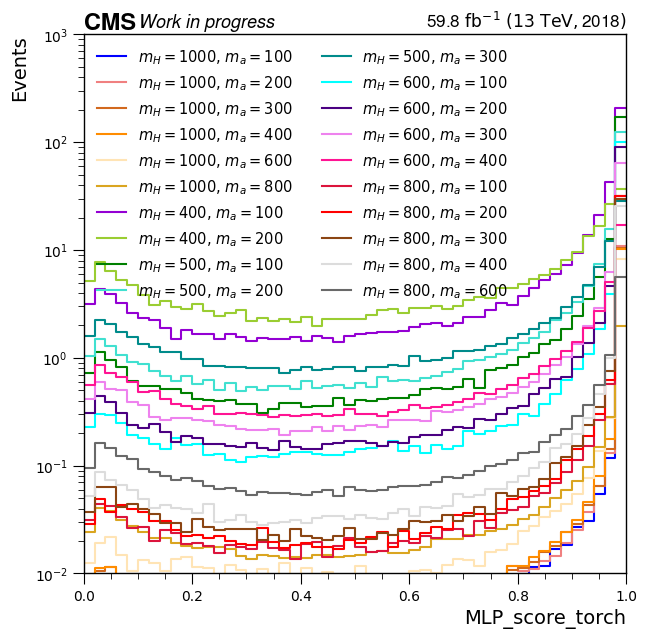

In [13]:
xlabel = "MLP_score_torch"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in all_signals:
    ana.step_plot(
        ax1, var1, ds[signal["key"]],
        label=signal["label"], color=signal["color"],
        weight="evtWeight", bins=bins
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e3], legend_loc="upper left"
)
plt.savefig(f"{figures_path}/{base_model_name}-{var1}-all_signals.png", dpi=200, facecolor='white')
plt.show()
plt.close()


## Plot XGB vs MLP Torch

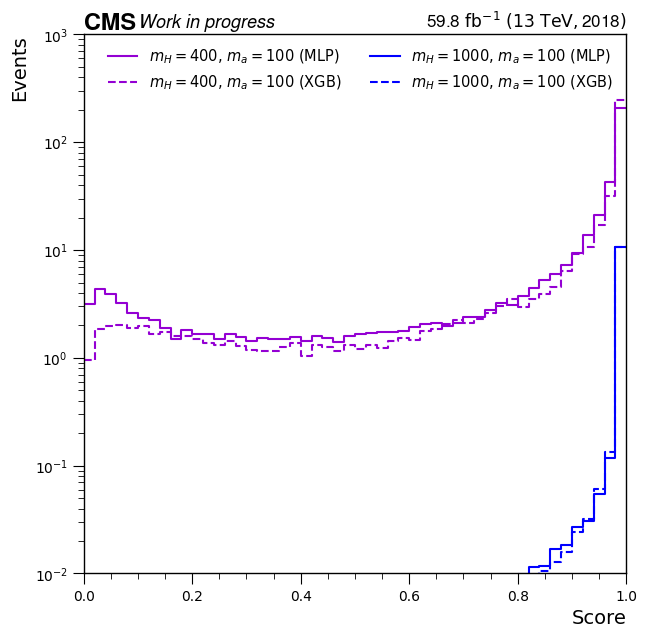

In [14]:
xlabel = "Score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var1, ds[signal["key"]],
        label=signal["label"] + " (MLP)", color=signal["color"],
        weight="evtWeight", bins=bins
    )
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"] + " (XGB)", color=signal["color"],
        weight="evtWeight", bins=bins, linestyle="--"
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e3]
)
plt.savefig(f"{figures_path}/{base_model_name}-discriminators-xgb-mlp-torch.png", dpi=200, facecolor='white')
plt.show()
plt.close()


## Plot MLP Keras vs MLP Torch

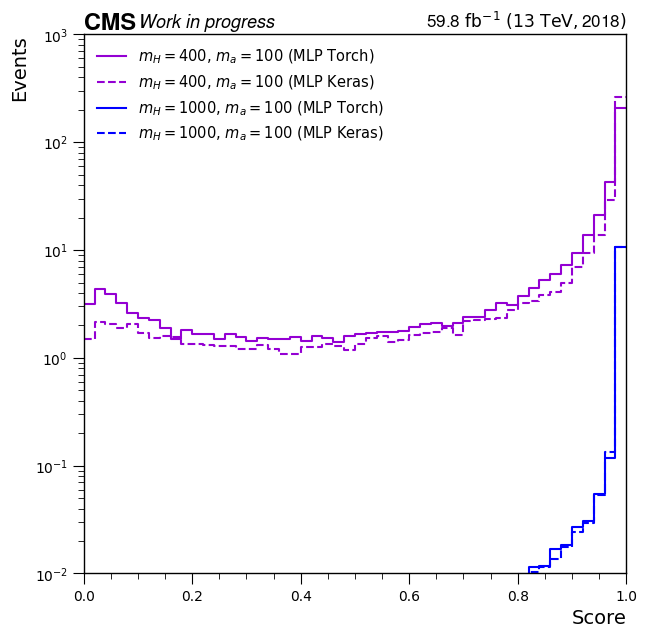

In [15]:
xlabel = "Score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var1, ds[signal["key"]],
        label=signal["label"] + " (MLP Torch)", color=signal["color"],
        weight="evtWeight", bins=bins
    )
    ana.step_plot(
        ax1, var3, ds[signal["key"]],
        label=signal["label"] + " (MLP Keras)", color=signal["color"],
        weight="evtWeight", bins=bins, linestyle="--"
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=1, ylim=[1.e-2,1.e3], legend_loc="upper left"
)
plt.savefig(f"{figures_path}/{base_model_name}-discriminators-mlp-keras-torch.png", dpi=200, facecolor='white')
plt.show()
plt.close()
